### IMPORTACIÓN DE PAQUETES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### DATA

In [ ]:
data = pd.read_csv("/content/Indice.csv") 
df = data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [ ]:
df['market_value']=df.ftse

In [ ]:
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

### MODELO ARIMA(p,d,q)

#### Test LLR

In [ ]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
import warnings
warnings.filterwarnings("ignore")

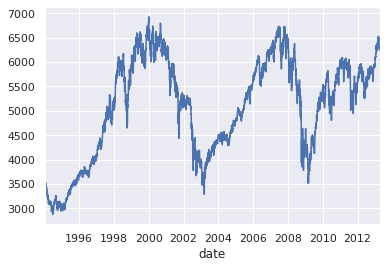

In [ ]:
df.market_value.plot()

#### ARIMA(1,1,1)

In [ ]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
ajuste_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
ajuste_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Sat, 05 Jun 2021   AIC                          55215.333
Time:                        21:00:35   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5656      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

#### ANALISIS DE LOS RESIDUOS ARIMA(1,1,1)

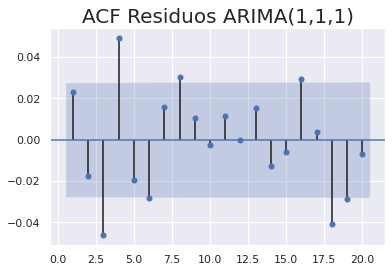

In [ ]:
df['res_ar_1_i_1_ma_1'] = ajuste_ar_1_i_1_ma_1.resid.iloc[:]
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 20)
plt.title("ACF Residuos ARIMA(1,1,1)",size=20)
plt.show()

#### MODELOS ARIMA DE ORDEN SUPERIOR (Higher-Lag)

In [ ]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
ajuste_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
ajuste_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
ajuste_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()
model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
ajuste_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()
model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
ajuste_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags=5)

In [ ]:
print("ARIMA(1,1,1):  \t LL = ", ajuste_ar_1_i_1_ma_1.llf, "\t AIC = ", ajuste_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2):  \t LL = ", ajuste_ar_1_i_1_ma_2.llf, "\t AIC = ", ajuste_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3):  \t LL = ", ajuste_ar_1_i_1_ma_3.llf, "\t AIC = ", ajuste_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1):  \t LL = ", ajuste_ar_2_i_1_ma_1.llf, "\t AIC = ", ajuste_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1):  \t LL = ", ajuste_ar_3_i_1_ma_1.llf, "\t AIC = ", ajuste_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2):  \t LL = ", ajuste_ar_3_i_1_ma_2.llf, "\t AIC = ", ajuste_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1):  	 LL =  -27603.66641276839 	 AIC =  55215.33282553678
ARIMA(1,1,2):  	 LL =  -27600.081863151576 	 AIC =  55210.16372630315
ARIMA(1,1,3):  	 LL =  -27590.424032629428 	 AIC =  55192.848065258855
ARIMA(2,1,1):  	 LL =  -27599.80748785492 	 AIC =  55209.61497570984
ARIMA(3,1,1):  	 LL =  -27592.05537171072 	 AIC =  55196.11074342144
ARIMA(3,1,2):  	 LL =  -27590.660808978784 	 AIC =  55195.32161795757


In [ ]:
print("\nLLR test p-value = " + str(LLR_test(ajuste_ar_1_i_1_ma_2, ajuste_ar_1_i_1_ma_3)))


LLR test p-value = 0.0


In [ ]:
print("\nLLR test p-value = " + str(LLR_test(ajuste_ar_1_i_1_ma_1, ajuste_ar_1_i_1_ma_3, DF = 2)))


LLR test p-value = 0.0


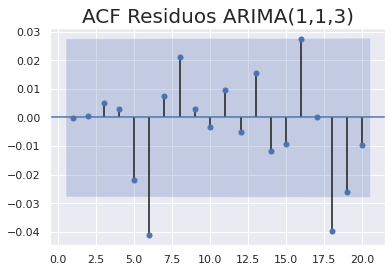

In [ ]:
df['res_ar_1_i_1_ma_3'] = ajuste_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 20)
plt.title("ACF Residuos ARIMA(1,1,3)", size=20)
plt.show()

### MODELO ARIMAX 

In [ ]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order=(1,1,1))
ajuste_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
ajuste_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Sat, 05 Jun 2021   AIC                          55217.112
Time:                        21:14:25   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5842      2.655     -0.220      0.826      -5.789       4.620
spx                      0.0011      0.002      0.450      0.653      -0.004       0.006
ar.L1.D.market_value     0.7456      0.070     10.578      0.000       0.607       0.884
ma.L1.D.market_value    -0.7917      0.065    -12.274      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3412           +0.0000j            1.3412            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
dfexog = df[['spx', 'dax', 'nikkei']]
dfexog.head()

,spx,dax,nikkei
date,,,
1994-01-07,469.90,2224.95,18124.01
1994-01-10,475.27,2225.00,18443.44
1994-01-11,474.13,2228.10,18485.25
1994-01-12,474.17,2182.06,18793.88
1994-01-13,472.47,2142.37,18577.26


In [ ]:
modelo_ARIMAX_1_1_1 = ARIMA(df.market_value, exog = dfexog, order=(1,1,1))
resultados_modelo_ARIMAX_1_1_1 = modelo_ARIMAX_1_1_1.fit()
resultados_modelo_ARIMAX_1_1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27602.578
Method:                       css-mle   S.D. of innovations             59.121
Date:                Sat, 05 Jun 2021   AIC                          55219.156
Time:                        21:16:48   BIC                          55264.804
Sample:                    01-10-1994   HQIC                         55235.152
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.7477      4.327     -1.097      0.273     -13.228       3.733
spx                      0.0097      0.006      1.631      0.103      -0.002       0.021
dax                     -0.0014      0.001     -1.418      0.156      -0.003       0.001
nikkei                   0.0001      0.000      0.721      0.471      -0.000       0.000
ar.L1.D.market_value     0.7483      0.071     10.599      0.000       0.610       0.887
ma.L1.D.market_value    -0.7949      0.065    -12.322      0.000      -0.921      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3363           +0.0000j            1.3363            0.0000
MA.1            1.2580           +0.0000j            1.2580            0.0000
-----------------------------------------------------------------------------
"""